In [39]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

In [3]:
# Create paths to data
home_path = str(Path.home())

data_dir_path = os.path.join(home_path, "Desktop", "drought-tracker",
                            "data")

spi_meta_path = os.path.join(data_dir_path, "ncdc", "us48-div-metadata.txt")

states_path = os.path.join(data_dir_path, "TIGER", "cb_2018_us_state_500k.shp")

marin_path = os.path.join(data_dir_path, "TIGER", "marin.geojson")

In [4]:
# Read metadata as fixed fidth format file in pandas
meta = pd.read_fwf(spi_meta_path, header=None)
meta.columns = ["div", "lat", "long", "state", "name"]
meta.set_index('div', inplace=True)

In [5]:
# Convert to gdf 
meta_gdf = gpd.GeoDataFrame(meta, 
                            geometry=gpd.points_from_xy(meta.long, meta.lat),
                           crs="epsg:4269")

# Get CA locations only
ca_stations = meta_gdf[meta_gdf.state == 'CA']

In [6]:
# Get CA shape
states = gpd.read_file(states_path)
ca = states[states.STUSPS == 'CA']

In [35]:
# Get Marin shape
marin = gpd.read_file(marin_path)

# Set correct crs to match
marin = marin.to_crs("epsg:4269")

# Find centroid
marin_center = gpd.GeoDataFrame(geometry=gpd.points_from_xy(marin.centroid.x, marin.centroid.y))

C:\Users\dphil\Miniconda3\envs\earth-analytics-python\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


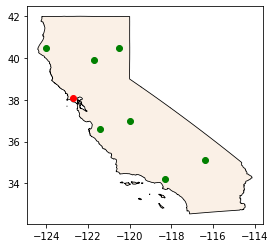

In [37]:
fig, ax = plt.subplots()

ca.plot(ax=ax, color='linen', zorder=1, linewidth = 0.8, edgecolor='black')

ca_stations.plot(ax=ax, color='green', zorder=2)

marin_center.plot(ax=ax, color='red', zorder=3)

plt.show()

In [44]:
# Find nearest point
marin_center.insert(1, 'nearest_geom', None)

ValueError: cannot insert nearest_geom, already exists